## Basic multivariate distributions

In [6]:
import tensorflow_probability as tfp
tfd = tfp.distributions
import matplotlib.pyplot as plt

In [9]:
# Define 2D multivariate Gaussian with diagonal covariance matrix

normal_diag = tfd.MultivariateNormalDiag(loc=[0.,1.], scale_diag=[1, 20])
normal_diag

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [10]:
# Sample from it

normal_diag.sample(10)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ -0.15278113,   8.883587  ],
       [ -1.2336855 ,   5.2548914 ],
       [ -0.62447864,  10.841656  ],
       [ -0.71042466,  12.5546    ],
       [  0.9423068 ,   3.4190896 ],
       [  1.2447554 , -28.41059   ],
       [  0.44407225,  -5.800122  ],
       [ -0.29954675, -14.219818  ],
       [  1.3405337 ,  -5.9054937 ],
       [ -0.31174245,  -2.5475864 ]], dtype=float32)>

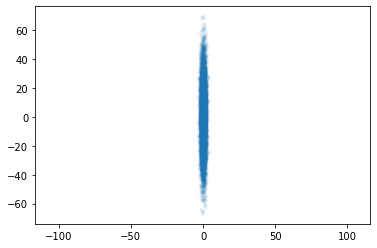

In [11]:
# Make a plot

plt_sample = normal_diag.sample(10000)
plt.scatter(plt_sample[:,0], plt_sample[:,1], marker='.', alpha=0.05)
plt.axis('equal')
plt.show()

#### Batches of multivariate distributions

In [17]:
# Create 3 "batches" of multivariate normals

normal_diag_batch = tfd.MultivariateNormalDiag(loc=[[0,0], [0,0], [0,0]],
                                              scale_diag=[[1, 2], [2,1], [2, 2]])

In [18]:
normal_diag_batch

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[3] event_shape=[2] dtype=float32>

In [19]:
# Sample from it

samples = normal_diag_batch.sample(5)
samples

<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[-1.7836189 , -5.256805  ],
        [ 3.2031186 ,  0.15872306],
        [-2.4725614 , -1.8422388 ]],

       [[ 0.4015563 ,  0.50078946],
        [ 1.9575839 ,  1.0698692 ],
        [ 1.6844492 ,  1.6809019 ]],

       [[ 1.1313175 , -2.631585  ],
        [-0.03352802,  2.136425  ],
        [-0.6554085 , -0.5675898 ]],

       [[-1.0277562 ,  2.83253   ],
        [ 0.47150823, -0.2157644 ],
        [-1.7559558 , -0.82536733]],

       [[ 0.7616646 ,  2.6607325 ],
        [-0.9581251 , -1.1822902 ],
        [ 4.339529  ,  1.9066064 ]]], dtype=float32)>

In [20]:
# Compute the log probs

normal_diag_batch.log_prob(samples)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-7.5759225, -3.8261168, -4.4125967],
       [-2.6429968, -3.5823512, -3.9320214],
       [-4.0366187, -4.8133206, -3.3181362],
       [-4.062069 , -2.5820913, -3.694748 ],
       [-3.706028 , -3.3446798, -6.032504 ]], dtype=float32)>

In [22]:
# Create a sample for a plot -- notice the shape

plt_sample_batch = normal_diag_batch.sample(10000)
plt_sample_batch.shape

TensorShape([10000, 3, 2])

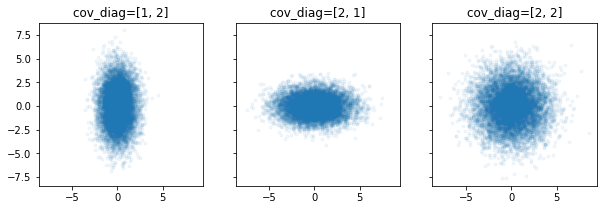

In [27]:
# Plot the samples from the batched multivariate Gaussian

fig, axs = (plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3)))
titles = ['cov_diag=[1, 2]', 'cov_diag=[2, 1]', 'cov_diag=[2, 2]']

for i, (ax, title) in enumerate(zip(axs,titles)):
    samples = plt_sample_batch[:,i,:] # Take the ith batch (samples x event_shape)
    ax.scatter(samples[:,0], samples[:,1], marker='.', alpha=0.05)
    ax.set_title(title)
plt.show()